In [27]:
%matplotlib inline
import matplotlib.pylab
import numpy as no
import pandas as pd

import pandas_datareader.data as web
start = pd.Timestamp('2013-1-1')
end = pd.Timestamp('2018-1-1')

In [28]:
f = web.DataReader("F", 'iex', start, end)

5y


In [29]:
f.head()

,open,high,low,close,volume
date,,,,,
2013-04-15,10.5486,10.6276,10.1933,10.2249,55849913
2013-04-16,10.3986,10.4539,10.2604,10.3591,36337661
2013-04-17,10.2407,10.3039,10.1051,10.2052,44568647
2013-04-18,10.2170,10.2486,9.9880,10.0670,34873364
2013-04-19,10.1696,10.2407,10.0670,10.2091,26971377


In [103]:
type(f.index)

pandas.core.indexes.base.Index

In [108]:
f.index = pd.to_datetime(f.index)

In [109]:
type(f.index)

pandas.core.indexes.datetimes.DatetimeIndex

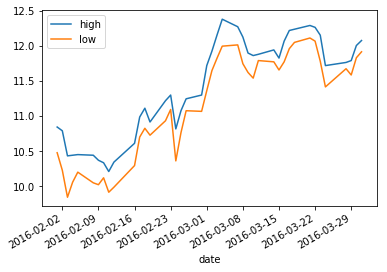

In [110]:
#plot high and low for 2 mnths in 2016
f.loc['2016-02': '2016-03'][['high','low']].plot()

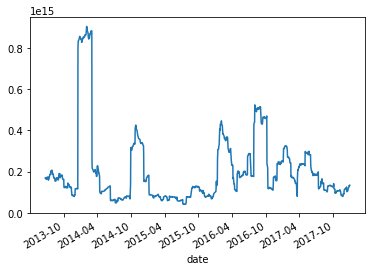

In [111]:
# is variance of trading volume relatively stable over time?
# one possible translation of question
r = f.rolling(50).var()['volume'].plot() 

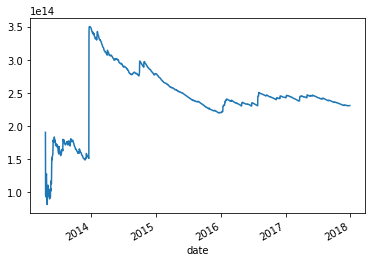

In [112]:
# another version
r = f.expanding().var()['volume'].plot() 

In [113]:
# how days did stock close higher than it opened
len( f[f.close > f.open])

552

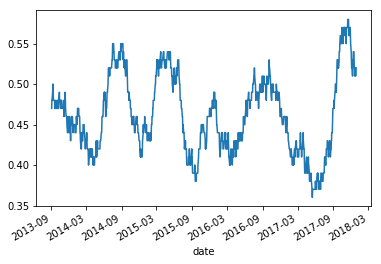

In [114]:
# did the up days become more or less frequent overtime
f['DayGain'] = f.close - f.open
f.rolling(window = 100)['DayGain'].apply( 
    lambda x: len([x_i for x_i in x if x_i > 0]) / len(x)).plot()

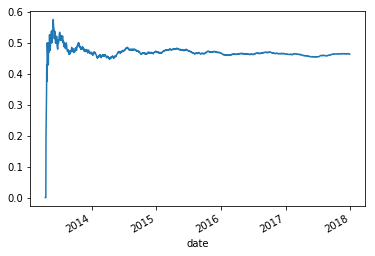

In [116]:
f.expanding()['DayGain'].apply( 
    lambda x: len([x_i for x_i in x if x_i > 0]) / len(x)).plot()

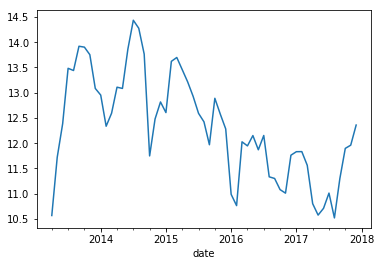

In [120]:
# compute and plot mean monthly high value of stock
f.resample('M').mean()['high'].plot()

In [127]:
# explore the variance of differenced volume
vol = f.volume - f.volume.shift()
vol.head()

date
2013-04-15           NaN
2013-04-16   -19512252.0
2013-04-17     8230986.0
2013-04-18    -9695283.0
2013-04-19    -7901987.0
Name: volume, dtype: float64

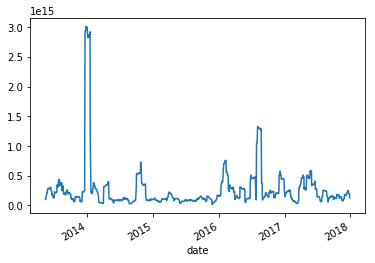

In [128]:
vol.rolling(window=20).var().plot()

In [131]:
# does the lagged time series correlate with itself
pd.DataFrame( {'real': f.volume, 'lagged': f.volume.shift()} ).corr()

,lagged,real
lagged,1.000000,0.462732
real,0.462732,1.000000
